In [1]:
# Load libraries
library(tidyverse)
library(survival)
library(survminer)
library(ggplot2)
library(broom)

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.0     ‚úî stringr   1.5.1
‚úî ggplot2   3.5.1     ‚úî tibble    3.2.1
‚úî lubridate 1.9.3     ‚úî tidyr     1.3.1
‚úî purrr     1.0.2     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: ggpubr


Attaching package: ‚Äòsurvminer‚Äô


The following object is masked from ‚Äòpackage:survival‚Äô:

    myeloma




# Load Data Set

In [2]:
# Tahap 1: Import data
data <- read_csv("/kaggle/input/ncctg-lung-cancer-data/cancer.csv") %>% 
    rename(id = `...1`)

New names:
‚Ä¢ `` -> `...1`
Rows: 228 Columns: 11
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
dbl (11): ...1, inst, time, status, age, sex, ph.ecog, ph.karno, pat.karno, ...

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
str(data)

spc_tbl_ [228 √ó 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id       : num [1:228] 1 2 3 4 5 6 7 8 9 10 ...
 $ inst     : num [1:228] 3 3 3 5 1 12 7 11 1 7 ...
 $ time     : num [1:228] 306 455 1010 210 883 ...
 $ status   : num [1:228] 2 2 1 2 2 1 2 2 2 2 ...
 $ age      : num [1:228] 74 68 56 57 60 74 68 71 53 61 ...
 $ sex      : num [1:228] 1 1 1 1 1 1 2 2 1 1 ...
 $ ph.ecog  : num [1:228] 1 0 0 1 0 1 2 2 1 2 ...
 $ ph.karno : num [1:228] 90 90 90 90 100 50 70 60 70 70 ...
 $ pat.karno: num [1:228] 100 90 90 60 90 80 60 80 80 70 ...
 $ meal.cal : num [1:228] 1175 1225 NA 1150 NA ...
 $ wt.loss  : num [1:228] NA 15 15 11 0 0 10 1 16 34 ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   inst = col_double(),
  ..   time = col_double(),
  ..   status = col_double(),
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   ph.ecog = col_double(),
  ..   ph.karno = col_double(),
  ..   pat.karno = col_double(),
  ..   meal.cal = col_double(),
  ..   wt.loss = c

In [4]:
colnames(data)

[1] "id"        "inst"      "time"      "status"    "age"       "sex"      
 [7] "ph.ecog"   "ph.karno"  "pat.karno" "meal.cal"  "wt.loss"

# Cek Missing Values

In [5]:
# Tahap 2.3.1: Cek Missing Values
data %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "missing_count") %>%
  filter(missing_count > 0)

variable  missing_count
1 inst       1           
2 ph.ecog    1           
3 ph.karno   1           
4 pat.karno  3           
5 meal.cal  47           
6 wt.loss   14

Ada terlalu banyak missing value sehingga butuh imputasi.

Warning message:
‚ÄúRemoved 14 rows containing non-finite outside the scale range (`stat_bin()`).‚Äù


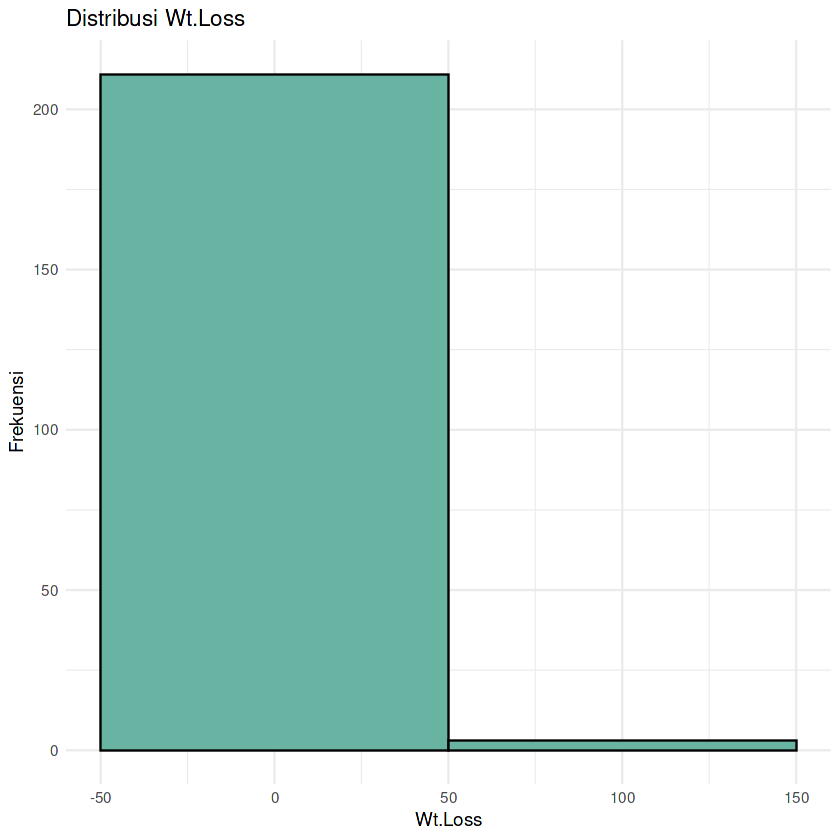

In [6]:
#Cek Kenormalan Meal.cal
ggplot(data, aes(x = wt.loss)) +
  geom_histogram(binwidth = 100, fill = "#69b3a2", color = "black") +
  labs(title = "Distribusi Wt.Loss",
       x = "Wt.Loss",
       y = "Frekuensi") +
  theme_minimal()

Karena tidak menyerupai distribusi normal, maka akan digunakan imputasi median.

In [7]:
#Imputasi Median pada Data yang Banyak Null
data <- data %>%
  mutate(
    wt.loss = if_else(is.na(wt.loss), median(wt.loss, na.rm = TRUE), wt.loss),
  )

# Imputasi dengan Regresi untuk Meal.cal

In [8]:
# Data lengkap (meal.cal tidak NA)
data_complete <- data %>% filter(!is.na(meal.cal))

# Data yang missing meal.cal
data_missing <- data %>% filter(is.na(meal.cal))

In [9]:
model <- lm(meal.cal ~ age + sex + ph.karno + pat.karno + wt.loss, data = data_complete)
summary(model)


Call:
lm(formula = meal.cal ~ age + sex + ph.karno + pat.karno + wt.loss, 
    data = data_complete)

Residuals:
   Min     1Q Median     3Q    Max 
-670.5 -254.4  -12.1  206.5 1762.7 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1950.871    353.098   5.525 1.19e-07 ***
age          -11.432      3.301  -3.463 0.000672 ***
sex         -192.294     60.442  -3.181 0.001737 ** 
ph.karno      -5.199      2.722  -1.910 0.057758 .  
pat.karno      5.290      2.273   2.327 0.021098 *  
wt.loss       -3.734      2.252  -1.658 0.099032 .  
---
Signif. codes:  0 ‚Äò***‚Äô 0.001 ‚Äò**‚Äô 0.01 ‚Äò*‚Äô 0.05 ‚Äò.‚Äô 0.1 ‚Äò ‚Äô 1

Residual standard error: 380.1 on 173 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.1357,	Adjusted R-squared:  0.1108 
F-statistic: 5.435 on 5 and 173 DF,  p-value: 0.0001138


In [10]:
predicted_mealcal <- predict(model, newdata = data_missing)

In [11]:
data_imputed <- data %>%
  mutate(meal.cal = ifelse(is.na(meal.cal), predicted_mealcal[match(row_number(), which(is.na(meal.cal)))], meal.cal))

In [12]:
summary(data_imputed$meal.cal)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   96.0   725.0   975.0   927.2  1082.7  2600.0       2 

In [13]:
data_imputed %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "missing_count") %>%
  filter(missing_count > 0)

variable  missing_count
1 inst      1            
2 ph.ecog   1            
3 ph.karno  1            
4 pat.karno 3            
5 meal.cal  2

Karena sudah tinggal dikit, maka bisa dihapus.

In [14]:
#Hapus Null Sisa
data <- data_imputed %>%
  filter(if_all(everything(), ~ !is.na(.)))

In [15]:
#Cek Kembali
data %>%
  summarise(across(everything(), ~ sum(is.na(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "missing_count") %>%
  filter(missing_count > 0)

variable missing_count

Udah ga ada data kosong.

In [16]:
str(data)

tibble [222 √ó 11] (S3: tbl_df/tbl/data.frame)
 $ id       : num [1:222] 1 2 3 4 5 6 7 8 9 10 ...
 $ inst     : num [1:222] 3 3 3 5 1 12 7 11 1 7 ...
 $ time     : num [1:222] 306 455 1010 210 883 ...
 $ status   : num [1:222] 2 2 1 2 2 1 2 2 2 2 ...
 $ age      : num [1:222] 74 68 56 57 60 74 68 71 53 61 ...
 $ sex      : num [1:222] 1 1 1 1 1 1 2 2 1 1 ...
 $ ph.ecog  : num [1:222] 1 0 0 1 0 1 2 2 1 2 ...
 $ ph.karno : num [1:222] 90 90 90 90 100 50 70 60 70 70 ...
 $ pat.karno: num [1:222] 100 90 90 60 90 80 60 80 80 70 ...
 $ meal.cal : num [1:222] 1175 1225 1071 1150 1029 ...
 $ wt.loss  : num [1:222] 7 15 15 11 0 0 10 1 16 34 ...


Ukuran masih tersisa 222 data point.

# Cek Outlier

In [17]:
# Tahap 2.3.2: Boxplot Outlier untuk variabel numerik
num_vars <- c("age", "ph.karno", "pat.karno", "meal.cal", "wt.loss")

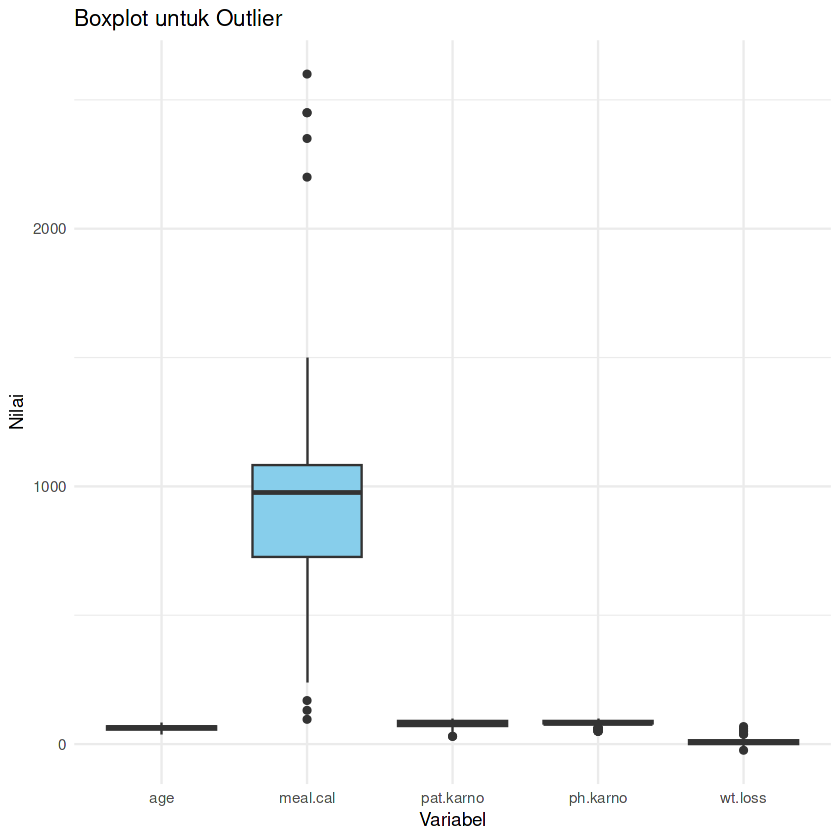

In [18]:
# Buat boxplot per variabel
data %>%
  select(all_of(num_vars)) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
  ggplot(aes(x = variable, y = value)) +
  geom_boxplot(fill = "skyblue") +
  theme_minimal() +
  labs(title = "Boxplot untuk Outlier", x = "Variabel", y = "Nilai")

# Hapus Outlier

In [19]:
remove_outlier_iqr <- function(x) {
  Q1 <- quantile(x, 0.25, na.rm = TRUE)
  Q3 <- quantile(x, 0.75, na.rm = TRUE)
  IQR_val <- Q3 - Q1
  x >= (Q1 - 1.5 * IQR_val) & x <= (Q3 + 1.5 * IQR_val)
}

data_clean <- data %>%
  filter(
    remove_outlier_iqr(age),
    remove_outlier_iqr(meal.cal),
    remove_outlier_iqr(wt.loss)
  )

In [20]:
str(data_clean)

tibble [208 √ó 11] (S3: tbl_df/tbl/data.frame)
 $ id       : num [1:208] 1 2 3 4 5 6 7 8 9 10 ...
 $ inst     : num [1:208] 3 3 3 5 1 12 7 11 1 7 ...
 $ time     : num [1:208] 306 455 1010 210 883 ...
 $ status   : num [1:208] 2 2 1 2 2 1 2 2 2 2 ...
 $ age      : num [1:208] 74 68 56 57 60 74 68 71 53 61 ...
 $ sex      : num [1:208] 1 1 1 1 1 1 2 2 1 1 ...
 $ ph.ecog  : num [1:208] 1 0 0 1 0 1 2 2 1 2 ...
 $ ph.karno : num [1:208] 90 90 90 90 100 50 70 60 70 70 ...
 $ pat.karno: num [1:208] 100 90 90 60 90 80 60 80 80 70 ...
 $ meal.cal : num [1:208] 1175 1225 1071 1150 1029 ...
 $ wt.loss  : num [1:208] 7 15 15 11 0 0 10 1 16 34 ...


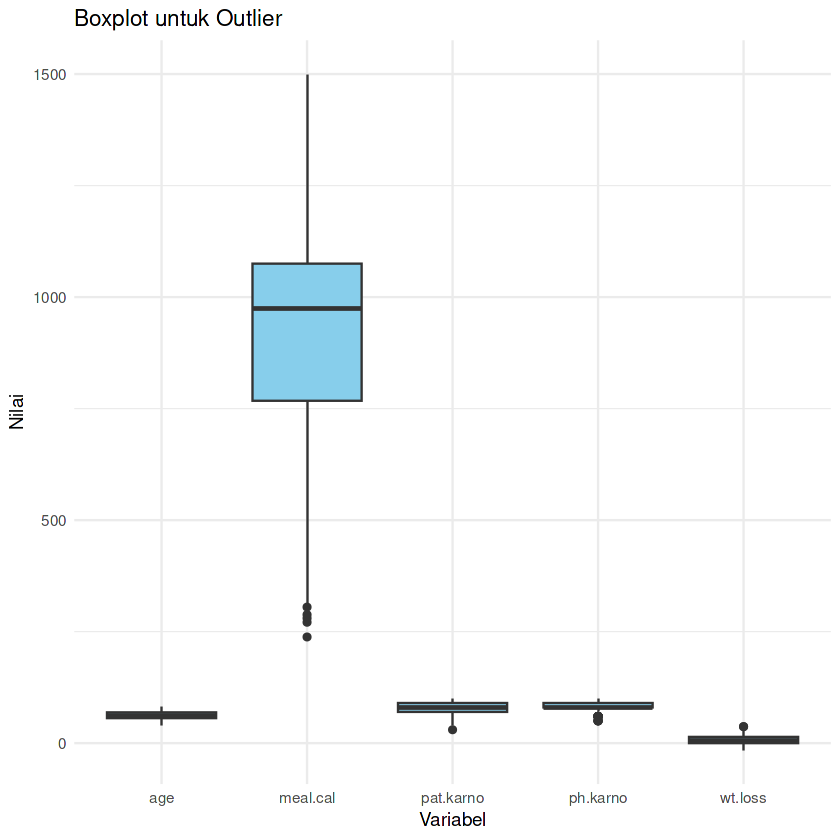

In [21]:
# Buat boxplot per variabel
data_clean %>%
  select(all_of(num_vars)) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
  ggplot(aes(x = variable, y = value)) +
  geom_boxplot(fill = "skyblue") +
  theme_minimal() +
  labs(title = "Boxplot untuk Outlier", x = "Variabel", y = "Nilai")

Outlier sudah tidak ada.

# Encoding

In [22]:
# Tahap 2.3.3: Mengubah Variabel Numerik ke Kategorik

data_clean <- data_clean %>%
  mutate(
    age_cat = case_when(
      age < 60 ~ "Young",
      age >= 60 & age <= 70 ~ "Middle",
      age > 70 ~ "Old",
      TRUE ~ NA_character_
    ),
    ph.karno_cat = case_when(
      ph.karno <= 60 ~ "Low",
      ph.karno > 60 & ph.karno <= 80 ~ "Medium",
      ph.karno > 80 ~ "High",
      TRUE ~ NA_character_
    ),
    pat.karno_cat = case_when(
      pat.karno <= 60 ~ "Low",
      pat.karno > 60 & pat.karno <= 80 ~ "Medium",
      pat.karno > 80 ~ "High",
      TRUE ~ NA_character_
    ),
    meal.cal_cat = case_when(
      meal.cal <= 1000 ~ "Low",
      meal.cal > 1000 & meal.cal <= 2000 ~ "Medium",
      meal.cal > 2000 ~ "High",
      TRUE ~ NA_character_
    ),
    wt.loss_cat = case_when(
      wt.loss <= 0 ~ "Gain/Stable",
      wt.loss > 0 & wt.loss <= 10 ~ "MildLoss",
      wt.loss > 10 ~ "SevereLoss",
      TRUE ~ NA_character_
    )
  )

In [23]:
data_encoded <- data_clean %>%
  mutate(across(c(age_cat, sex, ph.karno_cat, pat.karno_cat, meal.cal_cat, wt.loss_cat), as.factor)) %>%
  fastDummies::dummy_cols(select_columns = c("age_cat", "sex", "ph.karno_cat", "pat.karno_cat", "meal.cal_cat", "wt.loss_cat"), remove_first_dummy = TRUE, remove_selected_columns = TRUE)

In [24]:
glimpse(data_encoded)

Rows: 208
Columns: 20
$ id                     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, ‚Ä¶
$ inst                   <dbl> 3, 3, 3, 5, 1, 12, 7, 11, 1, 7, 6, 16, 11, 1, 2‚Ä¶
$ time                   <dbl> 306, 455, 1010, 210, 883, 1022, 310, 361, 218, ‚Ä¶
$ status                 <dbl> 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,‚Ä¶
$ age                    <dbl> 74, 68, 56, 57, 60, 74, 68, 71, 53, 61, 57, 68,‚Ä¶
$ ph.ecog                <dbl> 1, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2,‚Ä¶
$ ph.karno               <dbl> 90, 90, 90, 90, 100, 50, 70, 60, 70, 70, 80, 70‚Ä¶
$ pat.karno              <dbl> 100, 90, 90, 60, 90, 80, 60, 80, 80, 70, 80, 70‚Ä¶
$ meal.cal               <dbl> 1175.0000, 1225.0000, 1070.5412, 1150.0000, 102‚Ä¶
$ wt.loss                <dbl> 7, 15, 15, 11, 0, 0, 10, 1, 16, 34, 27, 23, 5, ‚Ä¶
$ age_cat_Old            <int> 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,‚Ä¶
$ age_cat_Young          <int> 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

# Kaplan Meier

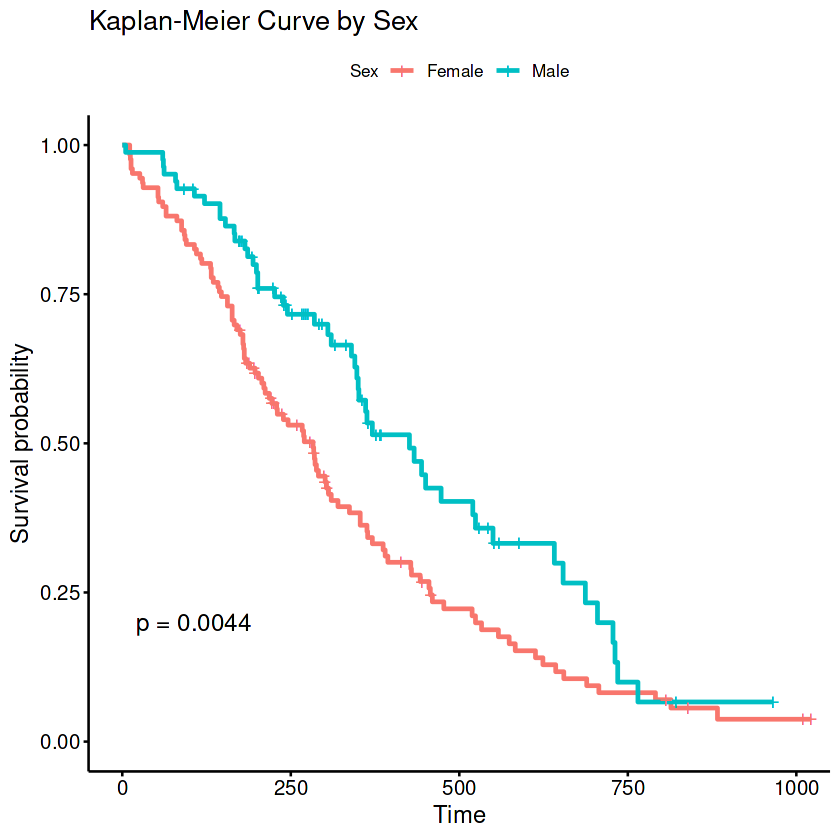

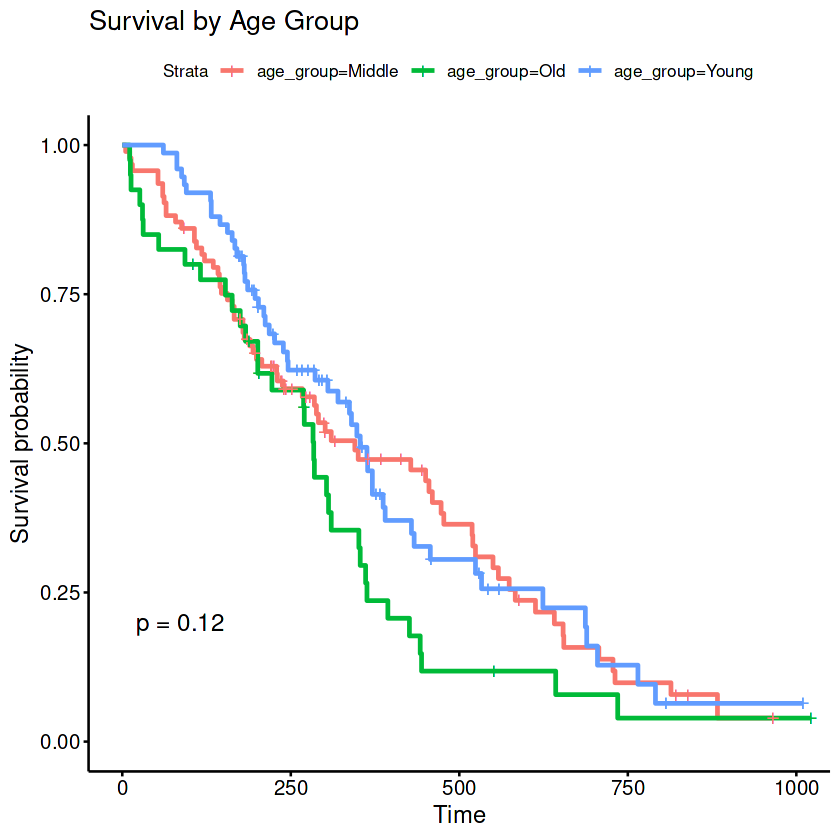

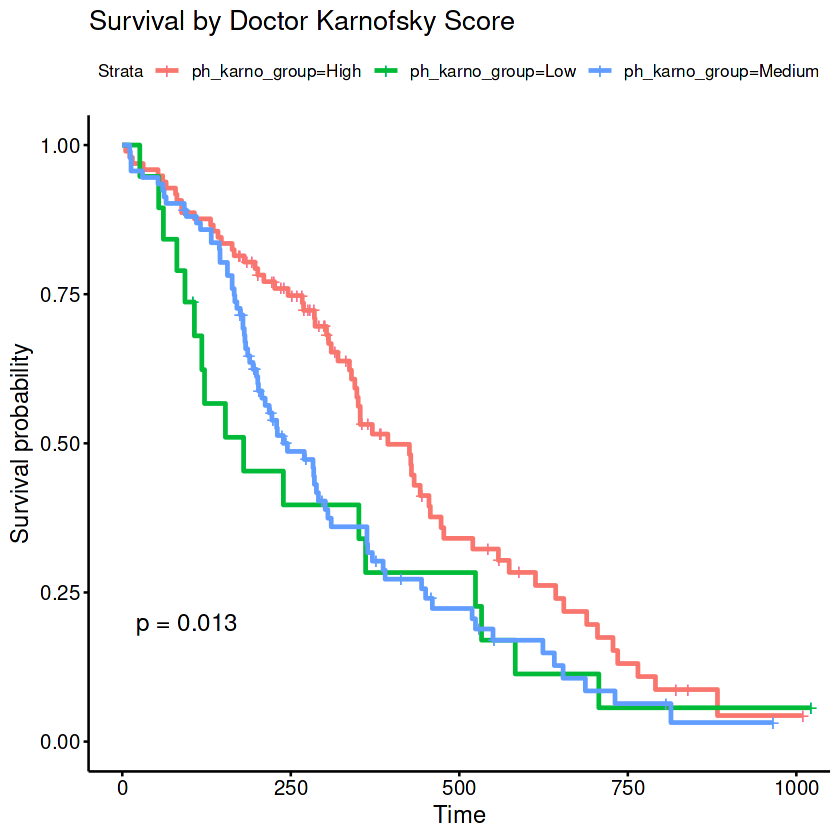

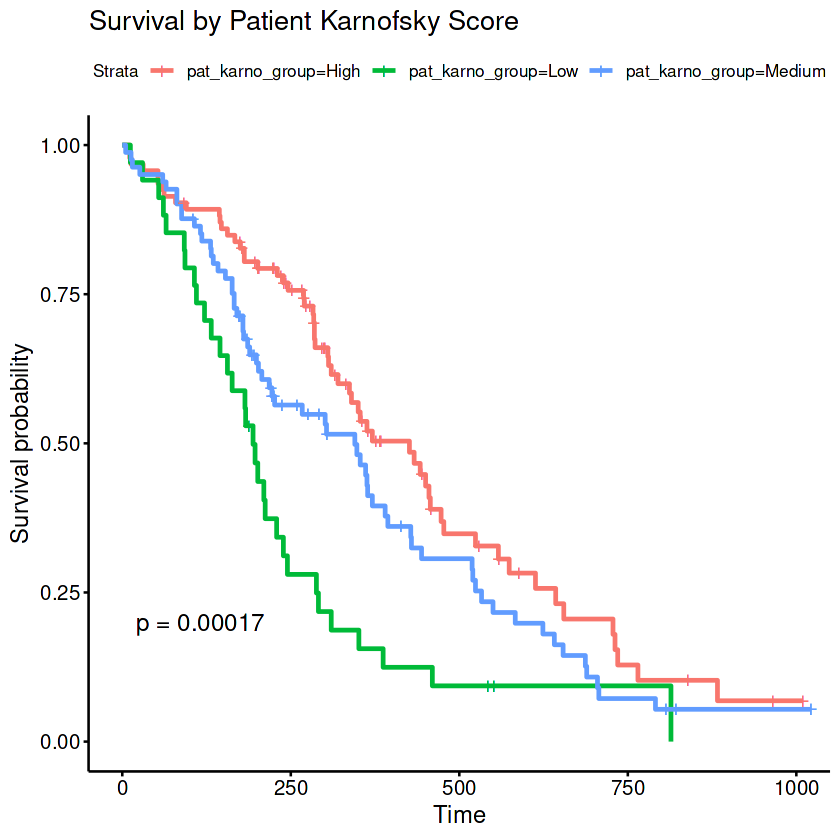

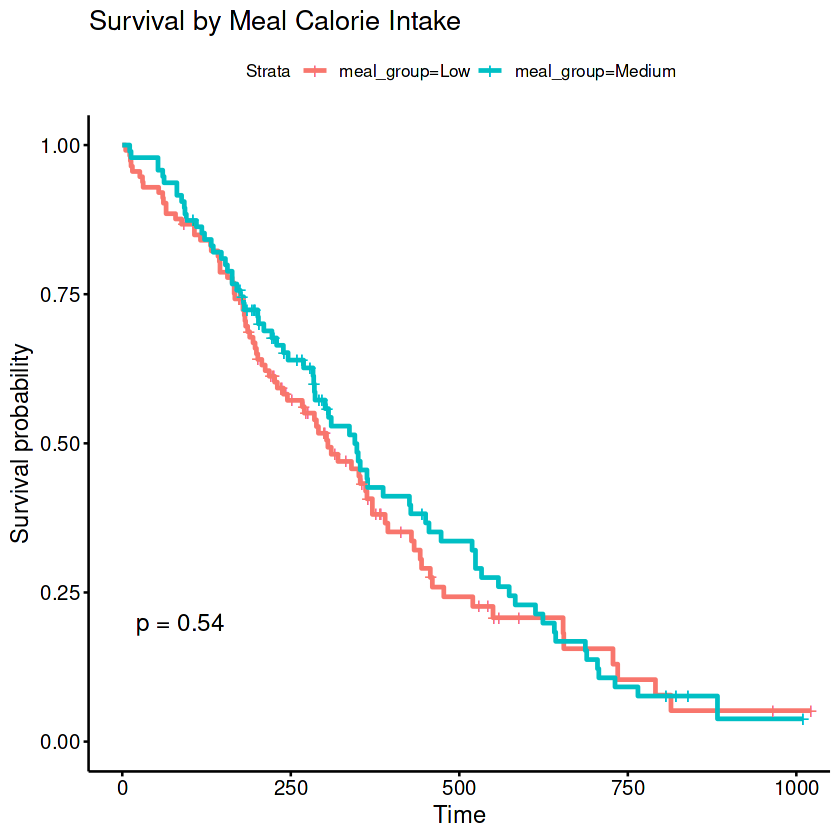

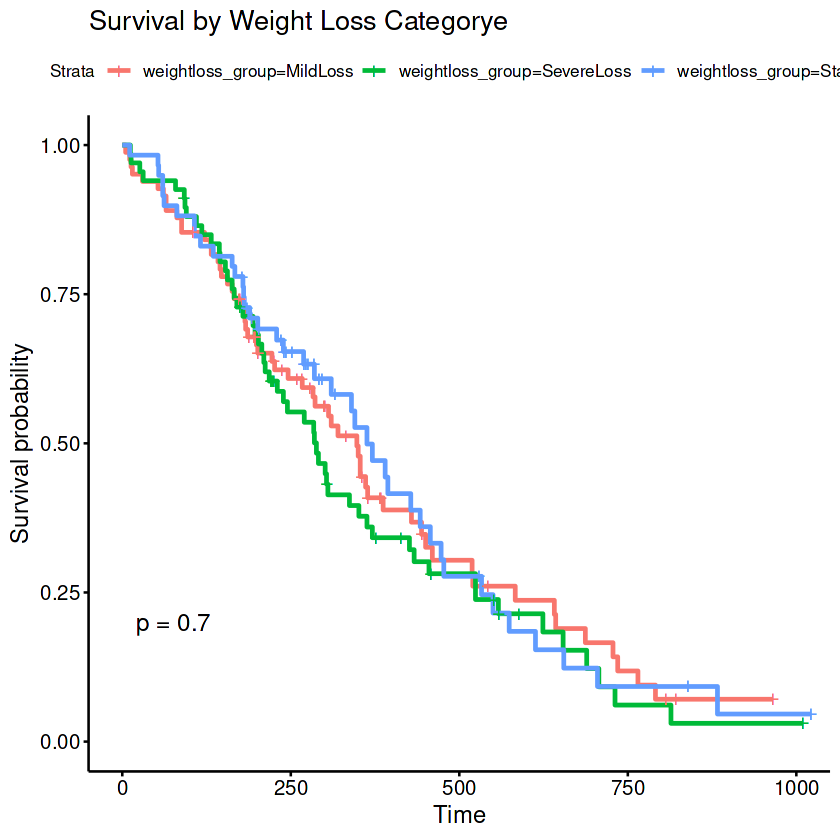

In [44]:
# Buat objek survival
surv_obj <- Surv(time = data_encoded$time, event = data_encoded$status == 2)

# 1. Kaplan-Meier berdasarkan Jenis Kelamin
km_sex <- survfit(surv_obj ~ sex_2, data = data_encoded)
ggsurvplot(km_sex, data = data_encoded,
           legend.title = "Sex",
           legend.labs = c("Female", "Male"),
           pval = TRUE,
           title = "Kaplan-Meier Curve by Sex")

# 2. Berdasarkan Usia (Kategori)
km_age <- survfit(surv_obj ~ age_cat_Old + age_cat_Young, data = data_encoded)
data_encoded$age_group <- factor(ifelse(data_encoded$age_cat_Old == 1, "Old",
                                  ifelse(data_encoded$age_cat_Young == 1, "Young", "Middle")))
km_age_grp <- survfit(surv_obj ~ age_group, data = data_encoded)
ggsurvplot(km_age_grp, data = data_encoded,
           title = "Survival by Age Group",
           pval = TRUE)

# 3. Berdasarkan ph.karno_cat
data_encoded$ph_karno_group <- factor(with(data_encoded,
                                  ifelse(ph.karno_cat_Low == 1, "Low",
                                  ifelse(ph.karno_cat_Medium == 1, "Medium", "High"))))
km_ph_karno <- survfit(surv_obj ~ ph_karno_group, data = data_encoded)
ggsurvplot(km_ph_karno, data = data_encoded,
           title = "Survival by Doctor Karnofsky Score",
           pval = TRUE)

# 4. Berdasarkan pat.karno_cat
data_encoded$pat_karno_group <- factor(with(data_encoded,
                                  ifelse(pat.karno_cat_Low == 1, "Low",
                                  ifelse(pat.karno_cat_Medium == 1, "Medium", "High"))))
km_pat_karno <- survfit(surv_obj ~ pat_karno_group, data = data_encoded)
ggsurvplot(km_pat_karno, data = data_encoded,
           title = "Survival by Patient Karnofsky Score",
           pval = TRUE)

# 5. Berdasarkan meal.cal_cat
data_encoded$meal_group <- factor(with(data_encoded,
                                ifelse(meal.cal_cat_Medium == 1, "Medium",
                                ifelse(meal.cal >= 2000, "High", "Low"))))
km_meal <- survfit(surv_obj ~ meal_group, data = data_encoded)
ggsurvplot(km_meal, data = data_encoded,
           title = "Survival by Meal Calorie Intake",
           pval = TRUE)

# 6. Berdasarkan wt.loss_cat
data_encoded$weightloss_group <- factor(with(data_encoded,
                              ifelse(wt.loss_cat_MildLoss == 1, "MildLoss",
                              ifelse(wt.loss_cat_SevereLoss == 1, "SevereLoss", "Stable"))))

km_wt <- survfit(surv_obj ~ weightloss_group, data = data_encoded)
ggsurvplot(km_wt, data = data_encoded,
           title = "Survival by Weight Loss Categorye",
           pval = TRUE)

# Membuat Model

In [25]:
surv_obj <- Surv(time = data_encoded$time, event = data_encoded$status == 2)

In [26]:
cox_model <- coxph(surv_obj ~ age_cat_Old + age_cat_Young + sex_2 +
                   ph.karno_cat_Low + ph.karno_cat_Medium +
                   pat.karno_cat_Low + pat.karno_cat_Medium +
                   meal.cal_cat_Medium +
                   wt.loss_cat_MildLoss + wt.loss_cat_SevereLoss,
                   data = data_encoded)

In [27]:
summary(cox_model)

Call:
coxph(formula = surv_obj ~ age_cat_Old + age_cat_Young + sex_2 + 
    ph.karno_cat_Low + ph.karno_cat_Medium + pat.karno_cat_Low + 
    pat.karno_cat_Medium + meal.cal_cat_Medium + wt.loss_cat_MildLoss + 
    wt.loss_cat_SevereLoss, data = data_encoded)

  n= 208, number of events= 152 

                            coef exp(coef)  se(coef)      z Pr(>|z|)   
age_cat_Old             0.363656  1.438579  0.220335  1.650  0.09885 . 
age_cat_Young          -0.026258  0.974084  0.191690 -0.137  0.89104   
sex_2                  -0.483850  0.616406  0.181053 -2.672  0.00753 **
ph.karno_cat_Low        0.139801  1.150045  0.318541  0.439  0.66075   
ph.karno_cat_Medium     0.313286  1.367912  0.200335  1.564  0.11786   
pat.karno_cat_Low       0.711860  2.037779  0.260437  2.733  0.00627 **
pat.karno_cat_Medium    0.223964  1.251026  0.208696  1.073  0.28320   
meal.cal_cat_Medium    -0.003366  0.996639  0.177396 -0.019  0.98486   
wt.loss_cat_MildLoss   -0.008173  0.991861  0.213020 -0.0

# Signifikansi

‚úÖ Signifikan
Jenis kelamin (sex_2): Laki-laki memiliki risiko kematian lebih tinggi (p = 0.0075).

Skor Karnofsky pasien rendah (pat.karno_cat_Low): Meningkatkan risiko kematian 2 kali lipat (p = 0.0063).

‚ö†Ô∏è Cenderung Signifikan
Usia tua (age_cat_Old): Ada kecenderungan risiko lebih tinggi, tapi belum signifikan (p = 0.099).

‚ùå Tidak Signifikan
Usia muda (age_cat_Young), skor Karnofsky dokter, intake kalori (meal.cal), dan penurunan berat badan (wt.loss) tidak menunjukkan pengaruh signifikan terhadap risiko kematian.



# Plot

Plot berdasar kelamin.

In [28]:
ggsurv_sex <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ sex_2, data = data_encoded),
  data = data_encoded,
  palette = "Set1",
  title = "Survival Curve by Sex",
  legend.labs = c("Male", "Female"),
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

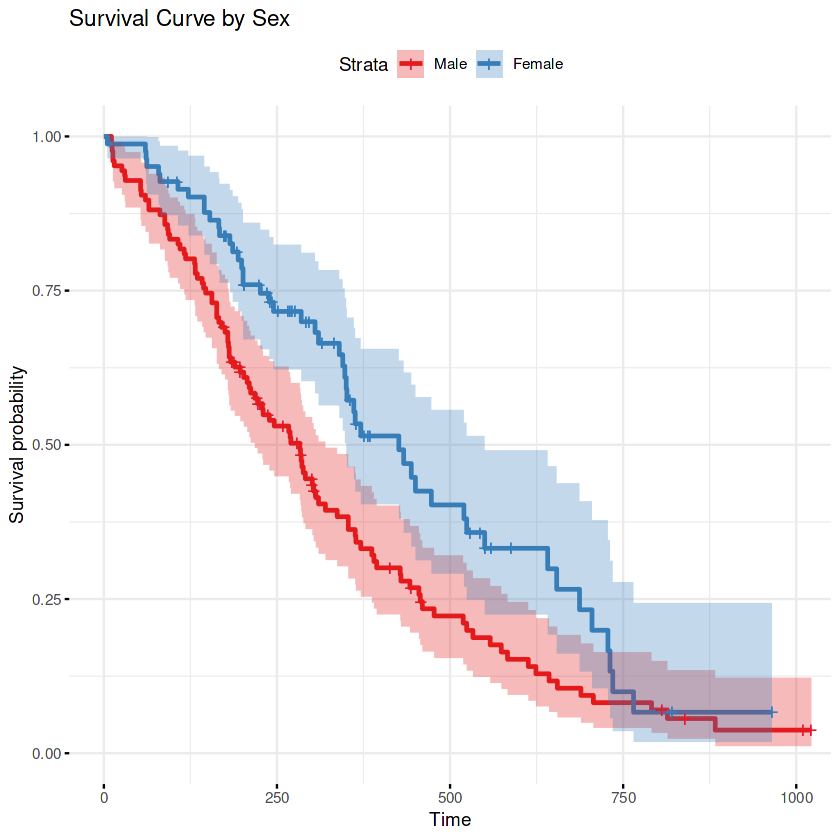

In [29]:
print(ggsurv_sex)

Plot berdasar umur.

In [30]:
ggsurv_age_cat <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ age_cat, data = data_clean),
  data = data_clean,
  palette = "Set1",
  title = "Survival Curve by Age Category",
  legend.title = "Age Group",
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

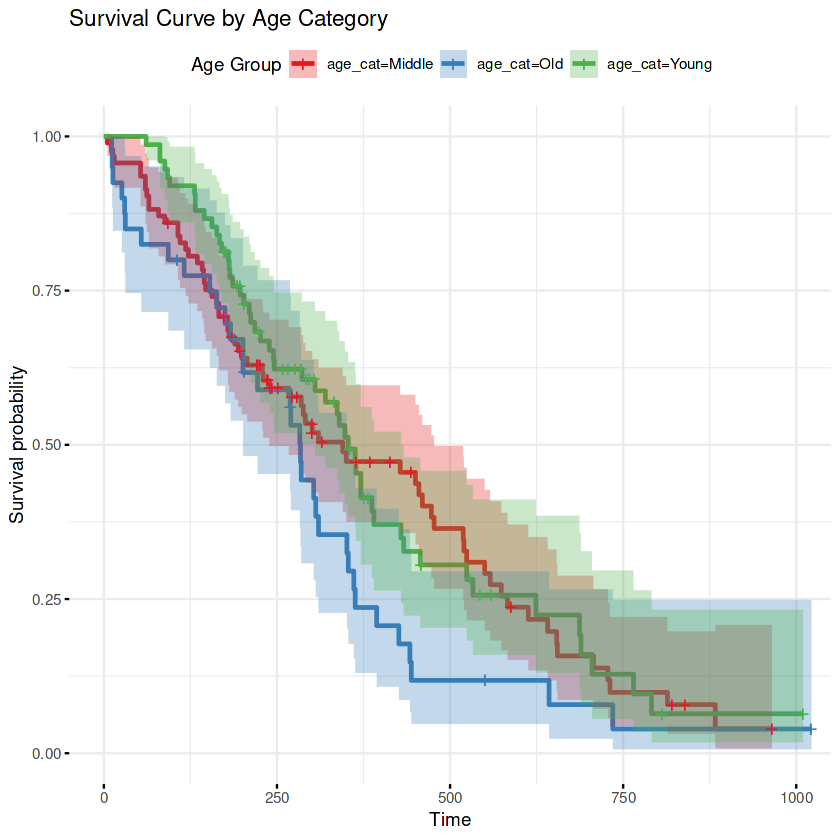

In [31]:
print(ggsurv_age_cat)

Plot berdasarkan ph.karno

In [32]:
ggsurv_phkarno <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ ph.karno_cat, data = data_clean),
  data = data_clean,
  palette = "Dark2",
  title = "Survival Curve by Physician Karnofsky",
  legend.title = "Physician Karnofsky",
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

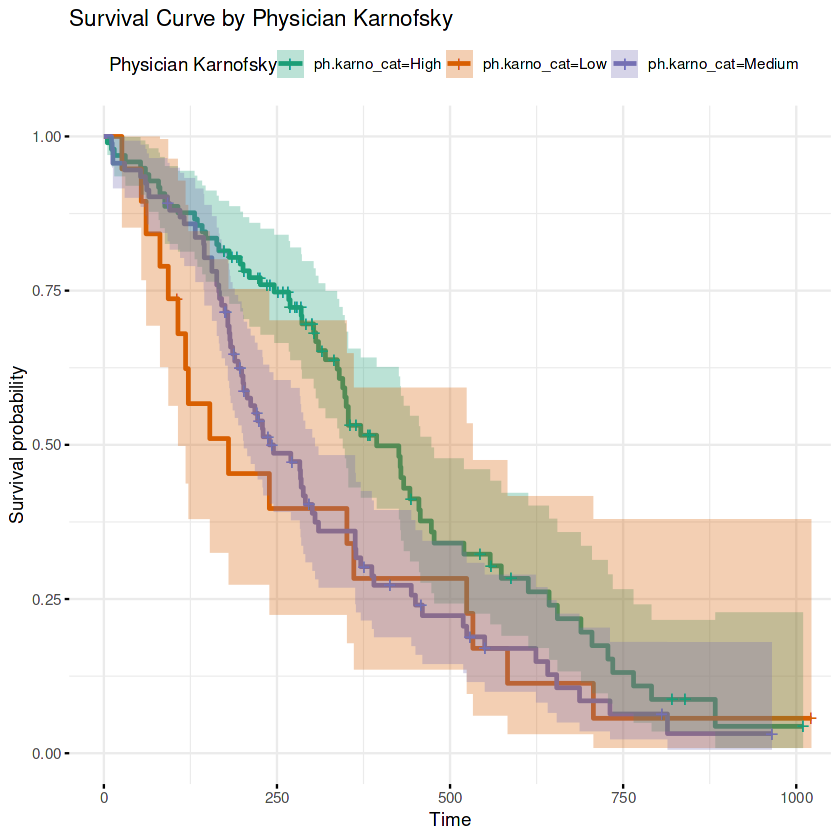

In [33]:
print(ggsurv_phkarno)

Plot berdasar pasien karno.

In [34]:
ggsurv_patkarno <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ pat.karno_cat, data = data_clean),
  data = data_clean,
  palette = "Accent",
  title = "Survival Curve by Patient Karnofsky",
  legend.title = "Patient Karnofsky",
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

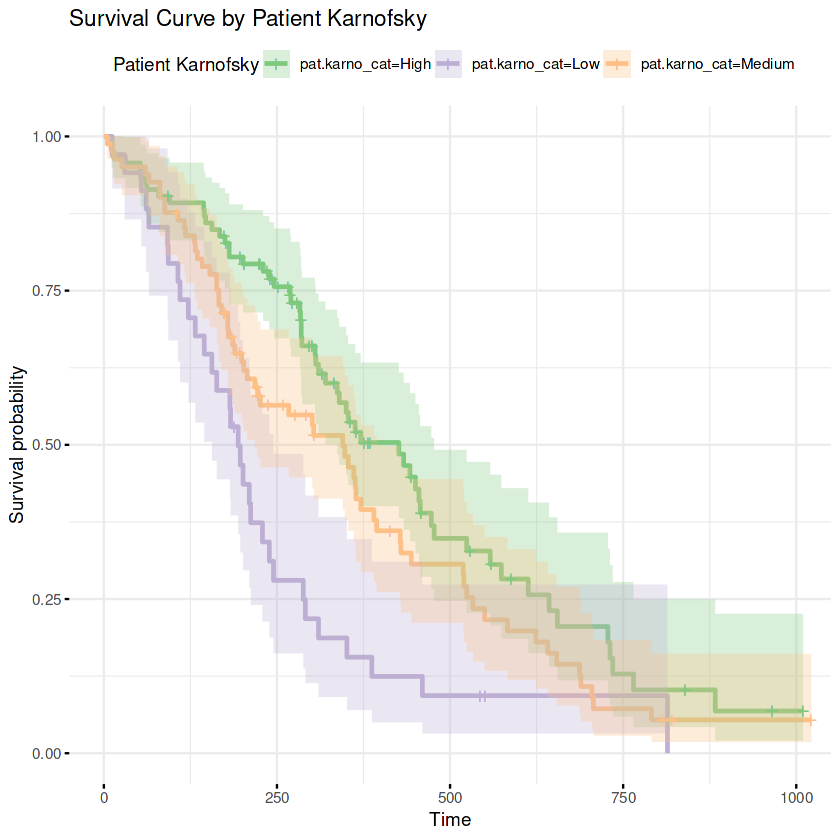

In [35]:
print(ggsurv_patkarno)

plot berdasar kalori makan.

In [36]:
ggsurv_mealcal <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ meal.cal_cat, data = data_clean),
  data = data_clean,
  palette = "Set2",
  title = "Survival Curve by Meal Calories",
  legend.title = "Meal Calories",
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

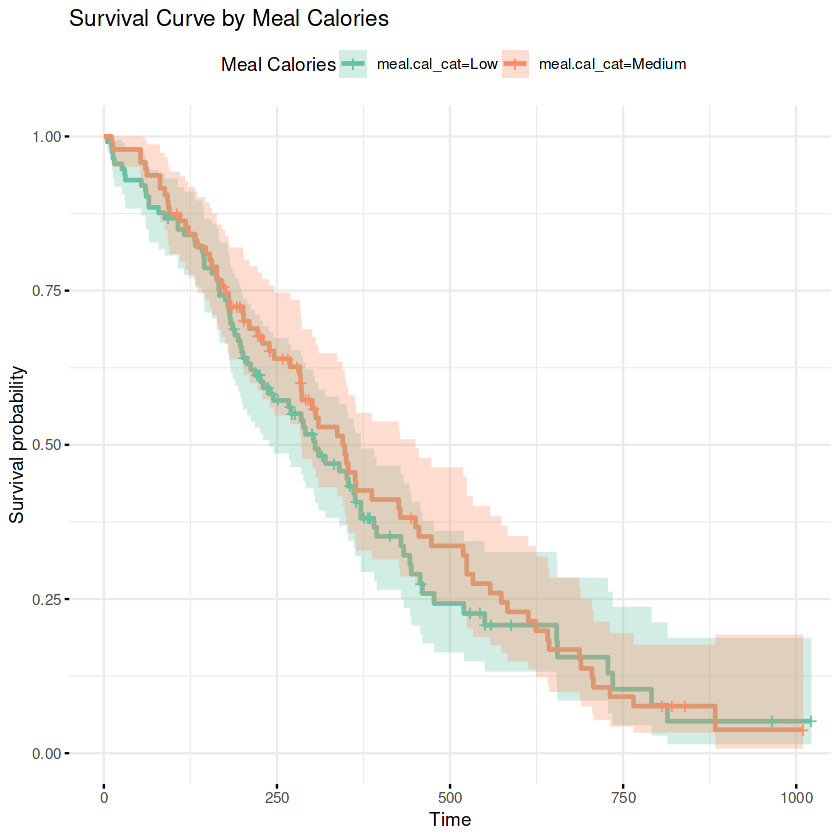

In [37]:
print(ggsurv_mealcal)

plot berdasar berat badan.

In [38]:
ggsurv_wtloss <- ggsurvplot(
  survfit(Surv(time, status == 2) ~ wt.loss_cat, data = data_clean),
  data = data_clean,
  palette = "Paired",
  title = "Survival Curve by Weight Loss Category",
  legend.title = "Weight Loss",
  conf.int = TRUE,
  ggtheme = theme_minimal()
)

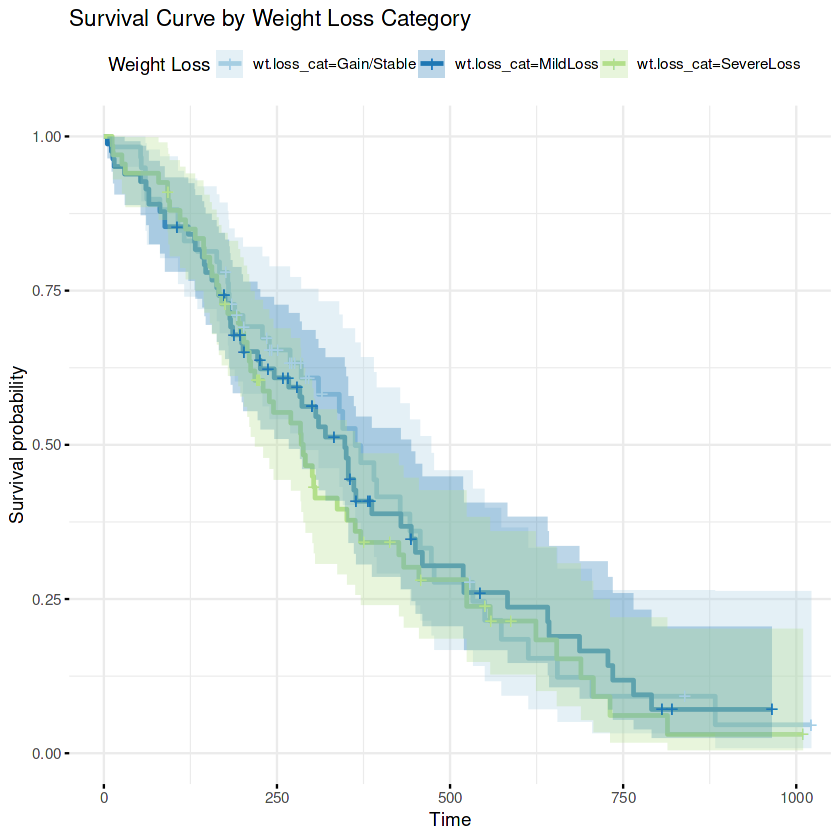

In [39]:
print(ggsurv_wtloss)

# Signifikansi Model

‚úÖ Signifikan
Jenis kelamin (sex_2): Laki-laki memiliki risiko kematian lebih tinggi (p = 0.0075).

Skor Karnofsky pasien rendah (pat.karno_cat_Low): Meningkatkan risiko kematian 2 kali lipat (p = 0.0063).

‚ö†Ô∏è Cenderung Signifikan
Usia tua (age_cat_Old): Ada kecenderungan risiko lebih tinggi, tapi belum signifikan (p = 0.099).

‚ùå Tidak Signifikan
Usia muda (age_cat_Young), skor Karnofsky dokter, intake kalori (meal.cal), dan penurunan berat badan (wt.loss) tidak menunjukkan pengaruh signifikan terhadap risiko kematian.



# Kesimpulan

Pertanyaan	Jawaban	Status
Risiko kematian laki-laki vs perempuan	-> Ya, laki-laki lebih tinggi ->‚úÖ Signifikan
Usia dan risiko kematian	-> Cenderung, tapi belum signifikan	 ->üü° Marginal
Pengaruh skor Karnofsky	 -> Ya, skor rendah ‚Üí risiko naik	-> ‚úÖ Signifikan (pat.karno)
Kalori rendah ‚Üí kematian	-> Tidak terbukti -> karena üî¥ Tidak signifikan